# Pre-Model EDA

## Table of Contents:
- [Imports](#Imports)
- [Loading the Data](#Loading-the-Data)
- [Target Distribution (Placement) Histogram](#Target-Distribution-(Placement)-Histogram)
- [Summary Statistics Observations](#Summary-Statistics-Observations)
- [Top Team Compositions by Placement (Initial)](#Top-Team-Compositions-by-Placement-(Initial))
    - [Plot & Observations (Initial)](#Plot-&-Observations-(Initial))
- [Creating New Combo Filtered Dataframe](#Creating-New-Combo-Filtered-Dataframe)
    - [Plot & Observations (Combos)](#Plot-&-Observations-(Combos))
- [Creating New Champion Filtered Dataframe](#Creating-New-Champion-Filtered-Dataframe)
    - [Plot & Observations (Champions)](#Plot-&-Observations-(Champions))


### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Data

Due to limitations on the API, data was gathered in pieces and concatenated together to create the master dataset.

In [2]:
df1 = pd.read_csv('../datasets/1k_data.csv', index_col = 0)
df2 = pd.read_csv('../datasets/2k_data.csv', index_col = 0)
df3 = pd.read_csv('../datasets/3k_data.csv', index_col = 0)
df4 = pd.read_csv('../datasets/4k_data.csv', index_col = 0)
df5 = pd.read_csv('../datasets/5k_data.csv', index_col = 0)

In [3]:
game_df = pd.concat([df1,df2,df3,df4,df5]).drop_duplicates().reset_index(drop=True)

C:\Users\YOU-Family\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5276 entries, 0 to 5275
Columns: 251 entries, Aatrox_1 to units_name
dtypes: float64(4), int64(239), object(8)
memory usage: 10.1+ MB


In [5]:
game_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aatrox_1,5276.0,0.013457,0.115233,0.000000,0.000000,0.000000,0.000000,1.000000
Aatrox_2,5276.0,0.106331,0.308289,0.000000,0.000000,0.000000,0.000000,1.000000
Aatrox_3,5276.0,0.010235,0.100659,0.000000,0.000000,0.000000,0.000000,1.000000
Alchemist_1,5276.0,0.104246,0.305608,0.000000,0.000000,0.000000,0.000000,1.000000
Annie_1,5276.0,0.041319,0.199046,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
level,5276.0,7.570887,0.922441,4.000000,7.000000,8.000000,8.000000,9.000000
placement,5276.0,4.627180,2.331554,1.000000,3.000000,5.000000,7.000000,8.000000
players_eliminated,5276.0,0.777293,1.114941,0.000000,0.000000,0.000000,1.000000,6.000000
time_eliminated,5276.0,1755.213170,302.233081,601.751099,1557.383636,1767.592529,1973.072662,2531.880859


### Target Distribution (Placement) Histogram

Using the cleaned data from riot API, we first check out the distribution of placement scores where placement is indicated as a value between 1 - 8.

Text(0, 0.5, 'frequency')

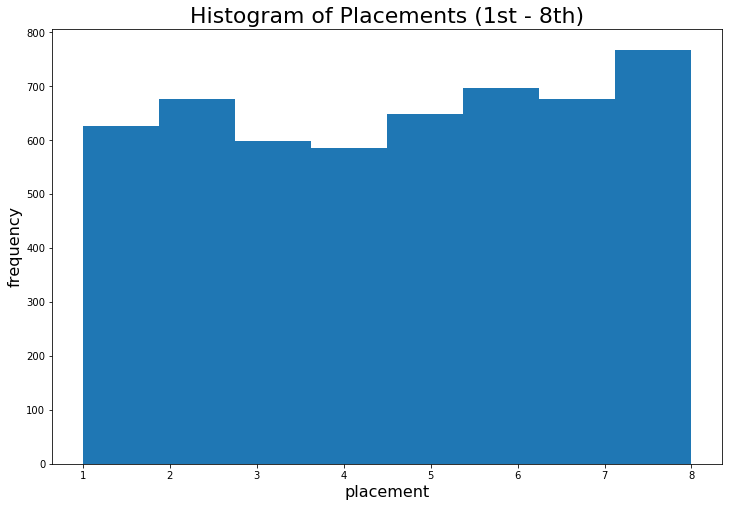

In [6]:
plt.figure(figsize = (12,8))

plt.hist(game_df.placement, bins= game_df.placement.max())

plt.title('Histogram of Placements (1st - 8th)', fontsize = '22')
plt.xlabel('placement', fontsize = '16')
plt.ylabel('frequency', fontsize = '16')


### Summary Statistics Observations

We want to check out the summary statistics of players who place 1st or 2nd place versus players who place 7th or 8th to see if there is any noticeable difference.

In [7]:
# summary statistics of players with high placements (1 or 2)
game_df[game_df['placement']<= 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Aatrox_1,1303.0,0.005372,0.073126,0.000000,0.000000,0.000000,0.000000,1.000000
Aatrox_2,1303.0,0.100537,0.300830,0.000000,0.000000,0.000000,0.000000,1.000000
Aatrox_3,1303.0,0.023024,0.150037,0.000000,0.000000,0.000000,0.000000,1.000000
Alchemist_1,1303.0,0.174981,0.380097,0.000000,0.000000,0.000000,0.000000,1.000000
Annie_1,1303.0,0.011512,0.106715,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
level,1303.0,8.243285,0.663903,6.000000,8.000000,8.000000,9.000000,9.000000
placement,1303.0,1.518803,0.499838,1.000000,1.000000,2.000000,2.000000,2.000000
players_eliminated,1303.0,2.148887,1.191726,0.000000,1.000000,2.000000,3.000000,6.000000
time_eliminated,1303.0,2085.611227,142.301608,1566.751099,1980.603638,2072.723877,2178.138794,2531.880859


In [8]:
# summary statistics of players with low placements (7 or 8)
game_df[game_df['placement']>= 7].describe().T

,count,mean,std,min,25%,50%,75%,max
Aatrox_1,1444.0,0.026316,0.160128,0.000000,0.000000,0.000000,0.000000,1.000000
Aatrox_2,1444.0,0.105263,0.306999,0.000000,0.000000,0.000000,0.000000,1.000000
Aatrox_3,1444.0,0.002078,0.045549,0.000000,0.000000,0.000000,0.000000,1.000000
Alchemist_1,1444.0,0.057479,0.232837,0.000000,0.000000,0.000000,0.000000,1.000000
Annie_1,1444.0,0.071330,0.257464,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
level,1444.0,6.870499,0.944321,4.000000,6.000000,7.000000,8.000000,9.000000
placement,1444.0,7.531856,0.499157,7.000000,7.000000,8.000000,8.000000,8.000000
players_eliminated,1444.0,0.037396,0.189796,0.000000,0.000000,0.000000,0.000000,1.000000
time_eliminated,1444.0,1410.722576,216.198776,601.751099,1316.344452,1451.756531,1556.889496,2010.268921


From above statistics, it is noticeable that there is a trend in few of the game features that can be easily interpretted.
- **level :** 1st & 2nd place has a higher average (it makes sense since they will be alive longer)
- **players_eliminated :** 1st & 2nd place has a higher average (they are likely stronger, have more chance to knock players out)
- **time_eliminated :** 1st & 2nd place has a higher average (since they are alive longer) 
- **total_damage_to_players :** 1st & 2nd place has a higher average (similar reasons to above) 

### Top Team Compositions by Placement (Initial)

Next, we will create a new dictionary to store separate dataframes of team composition & frequencies for each of the placement scores. 

In [9]:
placement_dict = {}

for placement in range(1,9):
    # subset list of team compositions + frequency for players for each placement
    placement_df = pd.DataFrame(game_df[game_df['placement']==placement].sum())
    placement_df = placement_df.iloc[14:234]
    
    # change the index and sort values to have individual lists of most used combinations
    placement_list = placement_df.reset_index()
    placement_list.rename( columns={'index' : 'combination', 0 :'count'}, inplace=True )
    placement_list.sort_values(by = 'count', ascending=False, inplace = True)
    placement_dict[f'placement_{placement}_df'] = placement_list


A quick view of the top combinations to verify the output.

In [10]:
placement_dict['placement_1_df'].head(5)

,combination,count
0,Berserker_0,297
142,Shadow_0,273
32,Inferno_0,262
161,Summoner_0,249
194,Warden_1,248


In [11]:
print(placement_dict['placement_1_df'].shape)
print(placement_dict['placement_2_df'].shape)
print(placement_dict['placement_3_df'].shape)
print(placement_dict['placement_4_df'].shape)
print(placement_dict['placement_5_df'].shape)
print(placement_dict['placement_6_df'].shape)
print(placement_dict['placement_7_df'].shape)
print(placement_dict['placement_8_df'].shape)

(220, 2)
(220, 2)
(220, 2)
(220, 2)
(220, 2)
(220, 2)
(220, 2)
(220, 2)


We will now create subplots of the top team combinations played by each of the placements.

#### Plot & Observations (Initial)

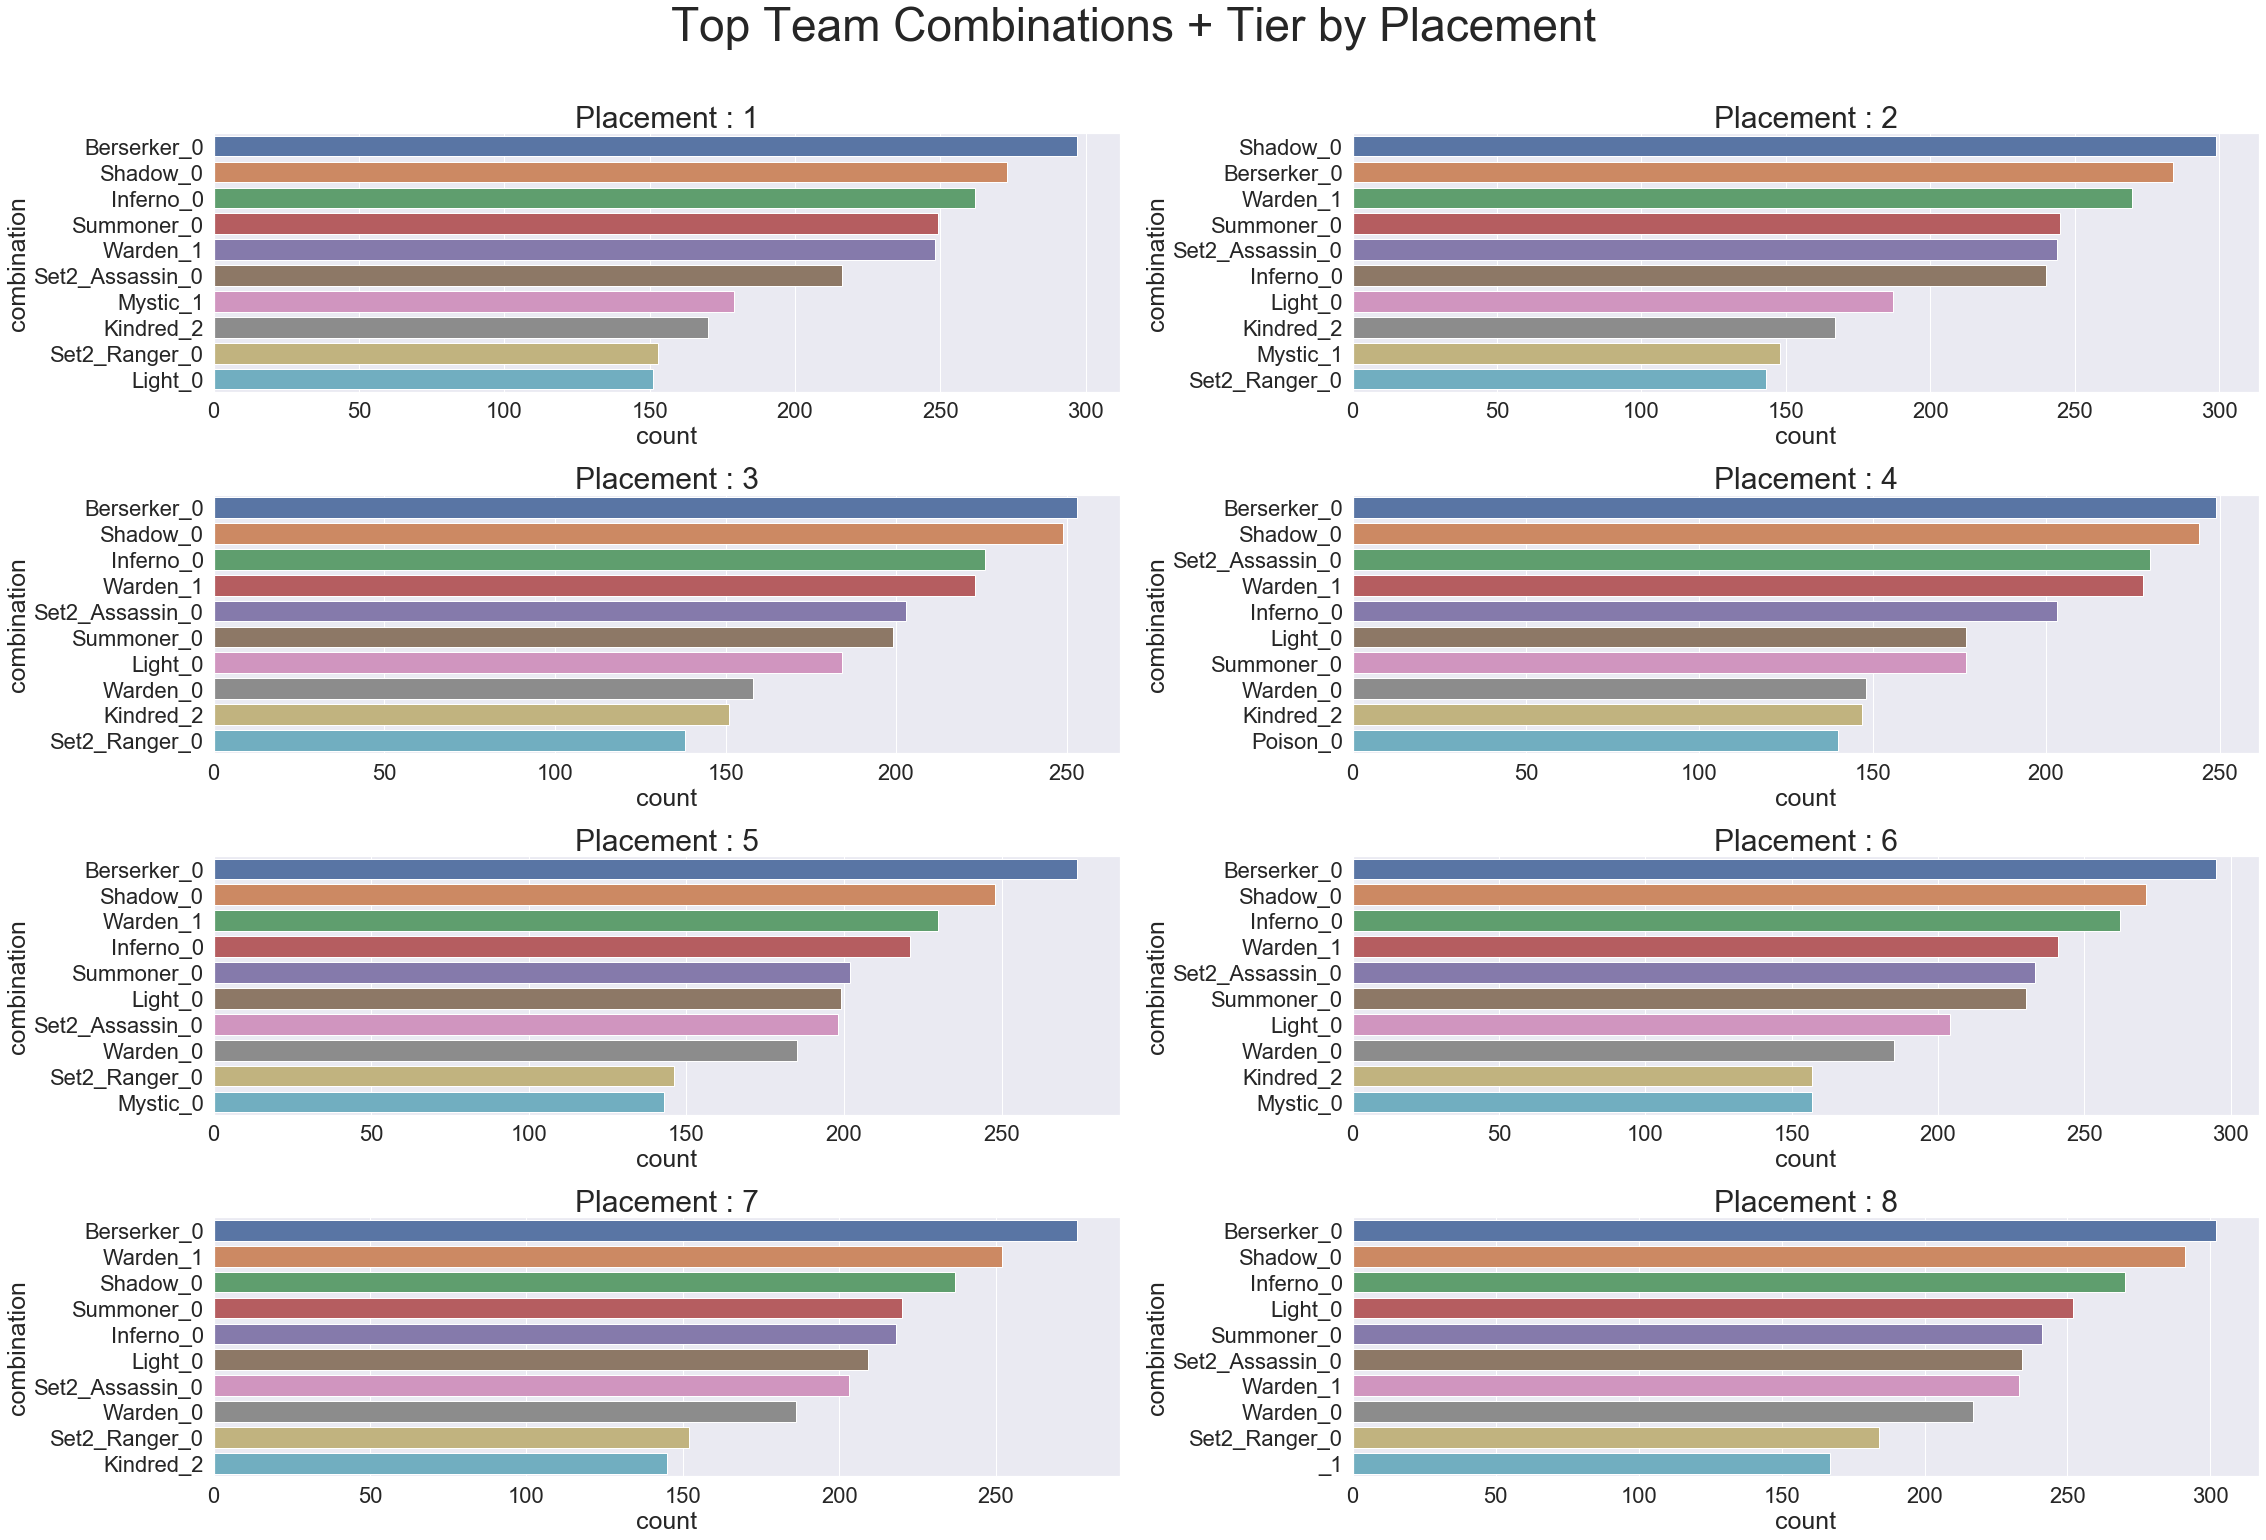

In [12]:
# code snippet from my reddit classification project
plt.figure(figsize = (32,22))
sns.set_style("whitegrid")
sns.set(font_scale = 2)
plt.suptitle('Top Team Combinations + Tier by Placement',fontsize = 46)

ax1 = plt.subplot(421)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 1',fontsize = 30)
ax1 = sns.barplot(data=placement_dict['placement_1_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(422)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 2',fontsize = 30)
ax1 = sns.barplot(data=placement_dict['placement_2_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(423)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 3',fontsize = 30)
ax1 = sns.barplot(data=placement_dict['placement_3_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(424)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 4',fontsize = 30)
ax1 = sns.barplot(data=placement_dict['placement_4_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(425)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 5',fontsize = 30)
ax1 = sns.barplot(data=placement_dict['placement_5_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(426)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 6',fontsize = 30)
ax1 = sns.barplot(data=placement_dict['placement_6_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(427)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 7',fontsize = 30)
ax1 = sns.barplot(data=placement_dict['placement_7_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(428)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 8',fontsize = 30)
ax1 = sns.barplot(data=placement_dict['placement_8_df'].head(10),x='count',y='combination',orient='h')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.savefig('../plots/top_team_combination_count.png')

From above visualizations, there are few things that can be inferred.
- It seems everyone of all placements seem to be using similar team compositions at first.
- However, a lot of the top played combination traits have a tier level of 0 (remember that 'Berserker_0' means Berserker combination at tier 0 where tier 0 = incomplete, no bonus.)
- In order to have a better understanding, the lists have to be cleaned once more.
- 'Set2_' prefix is attached to some column names which is irrelevant to our project so we will remove the prefix to universalize the column names.
- 'Kindred_2' is a champion data , which means that there are some champions that stand out which we will explore.

#### Renaming Set2 column names

We will first create a list of columns with 'Set2_' prefix then use it to remove the 'Set2_' characters from the column names in the game_df dataframe

In [13]:
# create a list of columns with 'Set2_'
set2_col_list = []
for col in game_df.columns:
    if 'Set2' in col:
        set2_col_list.append(col)
        
set2_col_list

['Set2_Assassin_0',
 'Set2_Assassin_1',
 'Set2_Assassin_2',
 'Set2_Blademaster_0',
 'Set2_Blademaster_1',
 'Set2_Blademaster_2',
 'Set2_Blademaster_3',
 'Set2_Glacial_0',
 'Set2_Glacial_1',
 'Set2_Glacial_2',
 'Set2_Glacial_3',
 'Set2_Ranger_0',
 'Set2_Ranger_1',
 'Set2_Ranger_2',
 'Set2_Ranger_3']

In [14]:
# removing the 'Set2_' string by replacing it with a an empty string
for set2_col in set2_col_list:
    game_df.rename(columns={set2_col: set2_col.replace('Set2_','')}, inplace=True)

### Creating New Combo Filtered Dataframe (Combos)

The new filtered dataframe we are creating will only consist of team combinations of interest that are obtainable by a player.

In [15]:
# we will create a new list of column names in game_data that only includes no combo bonus
tier_0_combo_list = []
for colnum in range(len(game_df.columns)) :
    selected_column = game_df.columns[colnum]
    
    # we look at the character index of the column to search for column names that ends with 0 (only traits have a tier 0 and not champions)
    if selected_column[-1] == '0' :
        
        tier_0_combo_list.append(selected_column)
    
tier_0_combo_list

['Berserker_0',
 'Celestial_0',
 'Crystal_0',
 'Desert_0',
 'Druid_0',
 'Electric_0',
 'Inferno_0',
 'Light_0',
 'Mage_0',
 'Metal_0',
 'Mountain_0',
 'Mystic_0',
 'Ocean_0',
 'Poison_0',
 'Predator_0',
 'Assassin_0',
 'Blademaster_0',
 'Glacial_0',
 'Ranger_0',
 'Shadow_0',
 'Soulbound_0',
 'Summoner_0',
 'Warden_0',
 'Wind_0',
 'Woodland_0']

Below is a function that we can use to create other trait/champion tiers

In [16]:
# this is a function created to replace the values of the tier from a 'tier_value' format in a column list

def tier_up(tier_list, first_val, second_val):
    tier_val_list = []
    for tier_val in tier_list:
        tier_val_list.append(tier_val.replace(first_val, second_val))
    return tier_val_list
    

We will call above functions to create other trait tier lists and print the first element to verify that the function works properly.

In [17]:
tier_1_combo_list = tier_up(tier_0_combo_list, '0','1')
tier_2_combo_list = tier_up(tier_1_combo_list, '1','2')
tier_3_combo_list = tier_up(tier_2_combo_list, '2','3')

print(tier_1_combo_list[0])
print(tier_2_combo_list[0])
print(tier_3_combo_list[0])

Berserker_1
Berserker_2
Berserker_3


We will then slice our game_df using the combo tier lists to obtain a new filtered dataframe for further analysis. 

**Keep in mind** : Some of the combos have a tier 3 bonus while some do not.

In [18]:
# creating a combo list of all tiers
tier_all_combo_list = []

tier_all_combo_list = tier_1_combo_list + tier_2_combo_list + tier_3_combo_list

# create a new dataframe with placement values
combo_filtered_game_df = game_df[['placement']]


# add columns of combos that exist in the original dataframe
for combo in tier_all_combo_list:
    if combo in game_df: 
        combo_filtered_game_df[combo] = game_df[combo].reset_index(drop=True)

C:\Users\YOU-Family\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [19]:
combo_filtered_game_df

,placement,Berserker_1,Celestial_1,Crystal_1,Desert_1,Druid_1,Electric_1,Inferno_1,Light_1,Mage_1,...,Electric_3,Inferno_3,Light_3,Metal_3,Ocean_3,Blademaster_3,Glacial_3,Ranger_3,Warden_3,Wind_3
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,5,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5272,6,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5273,5,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5274,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


We will save this as csv for model evaluation later on.

In [20]:
combo_filtered_game_df.to_csv('../datasets/combo_filtered_game_df.csv')

In [21]:
combo_dict = {}

for placement in range(1,9):
    # subset list of team compositions + frequency for players for each placement
    combo_filtered_df = pd.DataFrame(combo_filtered_game_df[combo_filtered_game_df['placement']==placement].sum())
    combo_filtered_df = combo_filtered_df.iloc[14:234]
    
    # change the index and sort values to have individual lists of most used combinations
    combo_filtered_list = combo_filtered_df.reset_index()
    combo_filtered_list.rename( columns={'index' : 'combination', 0 :'count'}, inplace=True )
    combo_filtered_list.sort_values(by = 'count', ascending=False, inplace = True)
    combo_dict[f'combo_filtered_{placement}_df'] = combo_filtered_list


In [22]:
combo_dict['combo_filtered_1_df'].head(5) 

,combination,count
9,Warden_1,248
0,Poison_1,120
4,Glacial_1,119
5,Ranger_1,113
3,Blademaster_1,84


In [23]:
combo_dict['combo_filtered_1_df']['count'].dtype

dtype('int64')

### Plot & Observations (Combos)

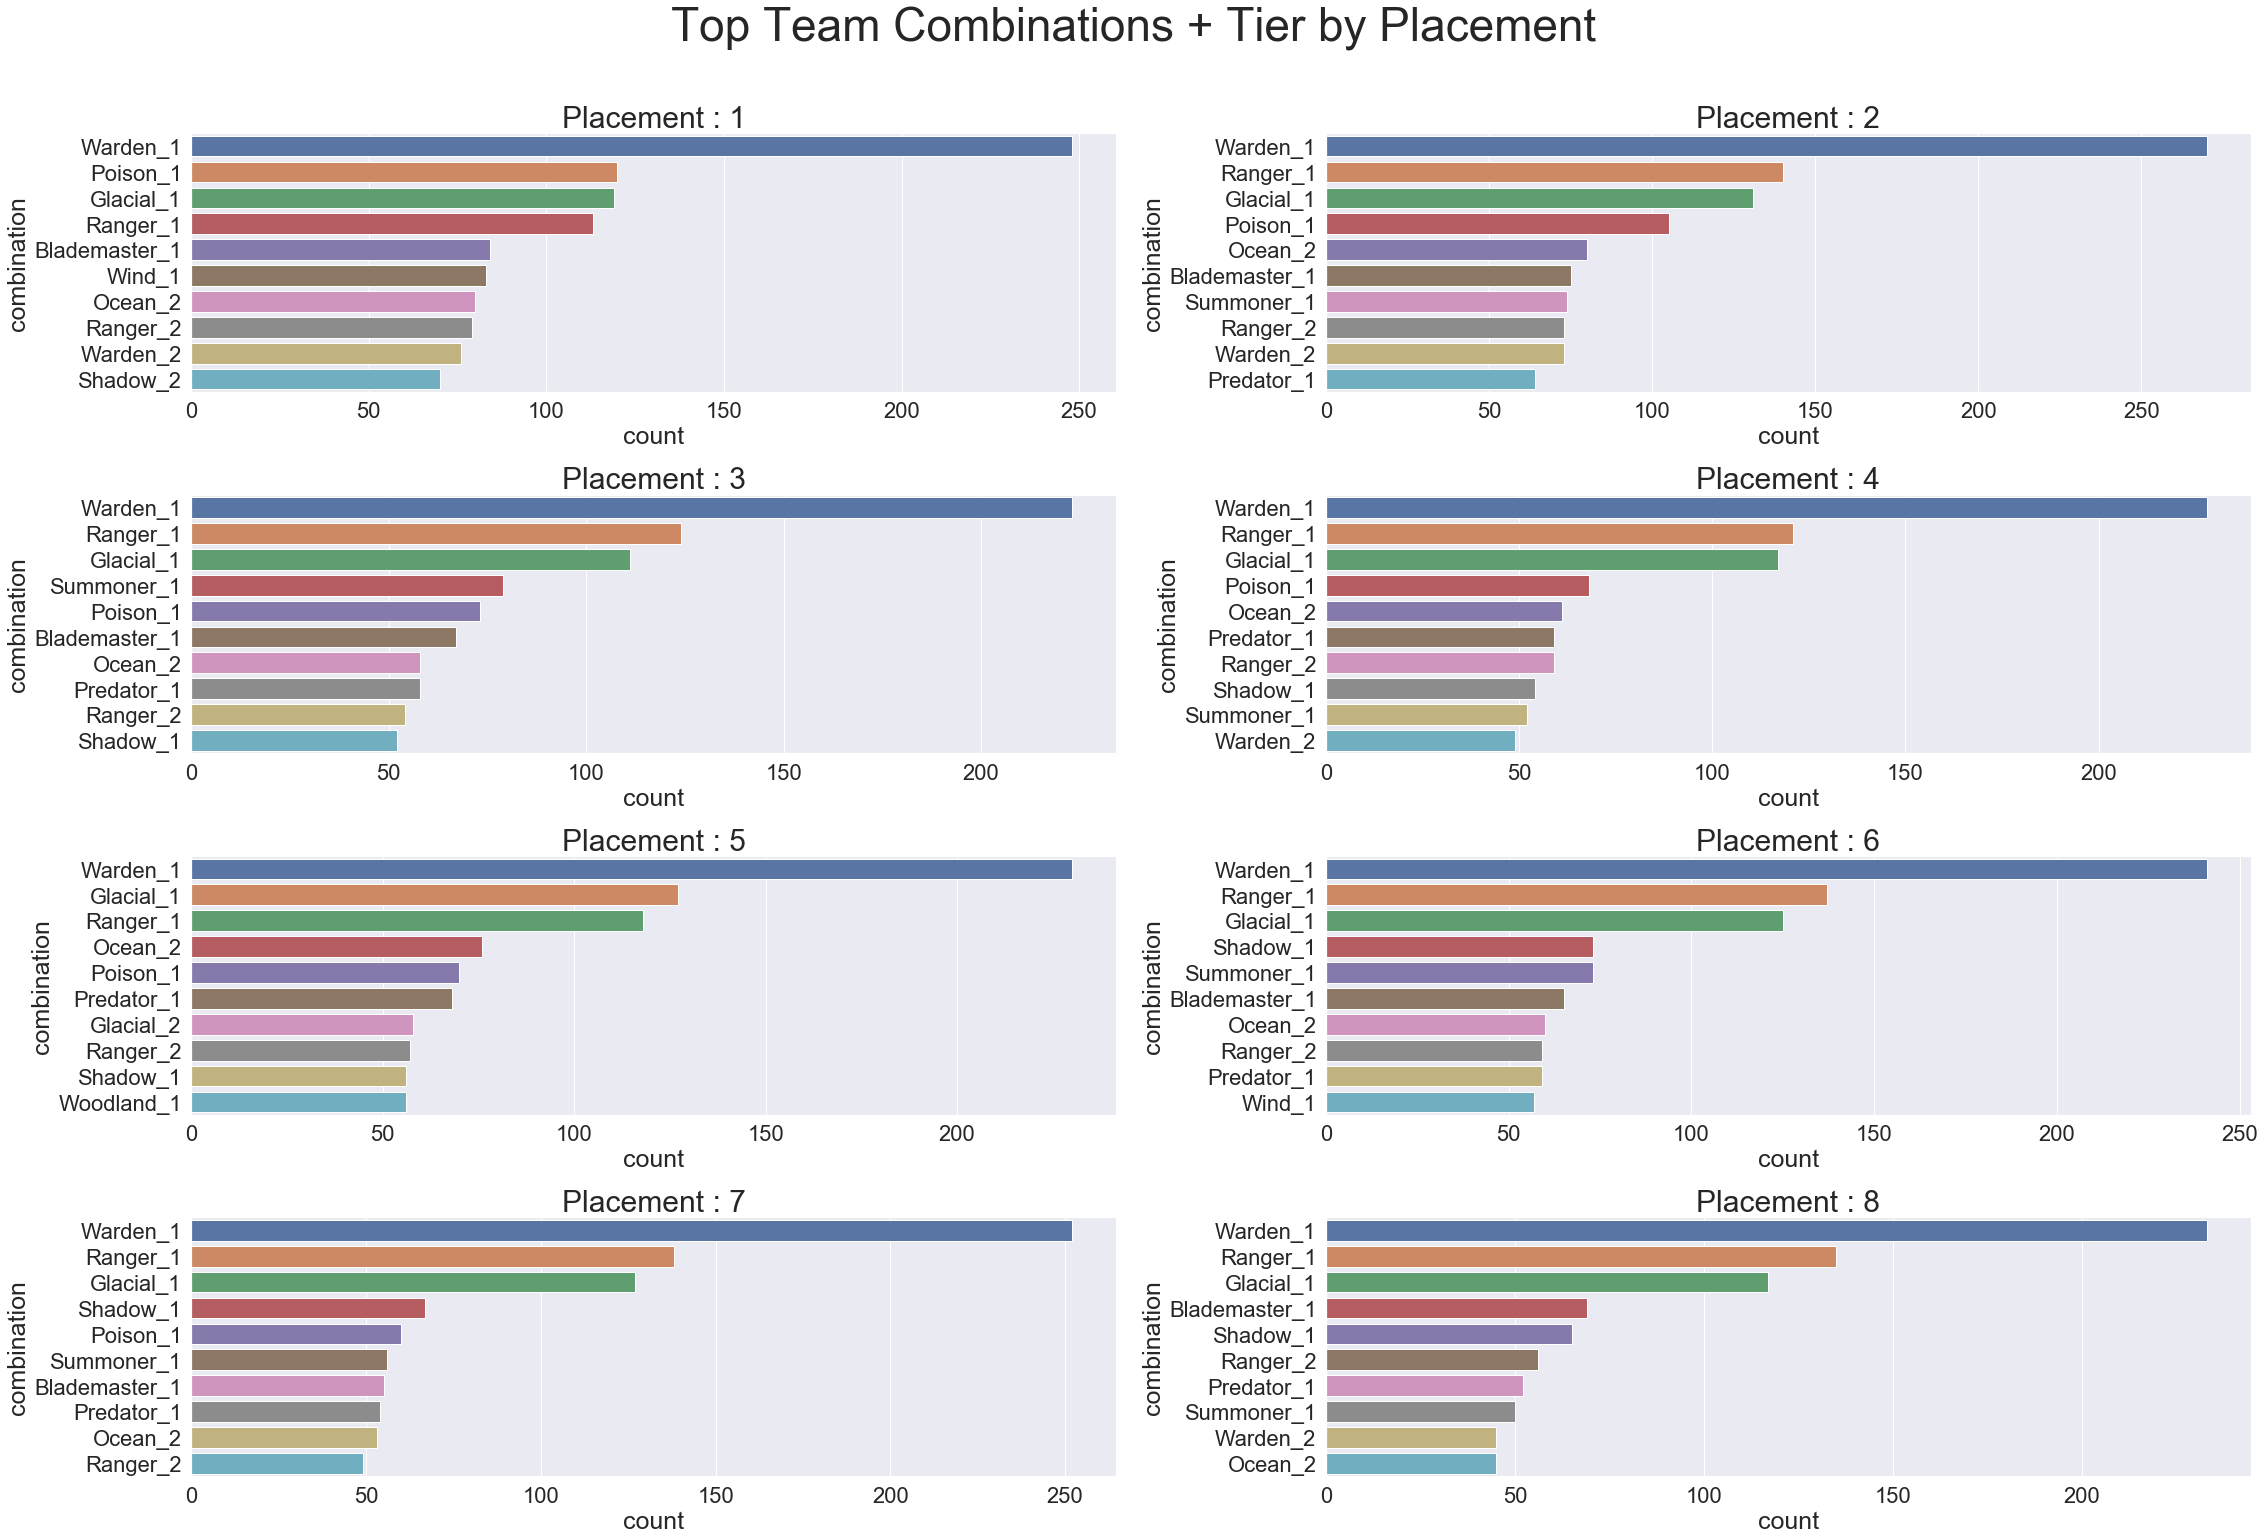

In [24]:
# code snippet from my reddit classification project
plt.figure(figsize = (32,22))
sns.set_style("whitegrid")
sns.set(font_scale = 2)
plt.suptitle('Top Team Combinations + Tier by Placement',fontsize = 46)

ax1 = plt.subplot(421)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 1',fontsize = 30)
ax1 = sns.barplot(data=combo_dict['combo_filtered_1_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(422)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 2',fontsize = 30)
ax1 = sns.barplot(data=combo_dict['combo_filtered_2_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(423)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 3',fontsize = 30)
ax1 = sns.barplot(data=combo_dict['combo_filtered_3_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(424)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 4',fontsize = 30)
ax1 = sns.barplot(data=combo_dict['combo_filtered_4_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(425)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 5',fontsize = 30)
ax1 = sns.barplot(data=combo_dict['combo_filtered_5_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(426)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 6',fontsize = 30)
ax1 = sns.barplot(data=combo_dict['combo_filtered_6_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(427)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 7',fontsize = 30)
ax1 = sns.barplot(data=combo_dict['combo_filtered_7_df'].head(10),x='count',y='combination',orient='h')

ax1 = plt.subplot(428)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('combination', fontsize=25)
ax1.set_title('Placement : 8',fontsize = 30)
ax1 = sns.barplot(data=combo_dict['combo_filtered_8_df'].head(10),x='count',y='combination',orient='h')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.savefig('../plots/top_team_combination_count_cleaned.png')

### observation from above

From the newly created visualizations above, there are few things that can be inferred.
- Most players have a combination of teams that includes Warden tier 1 bonus (this is one of the most easily obtainable combinations so it makes sense)
- Poison tier 1 bonus is most used by players that win (1st place) but slowly goes down in popularity as players placement goes down.
- Wind tier 1 bonus is also apparent for 1st place players but not as apparent in other players.
- Shadow tier 2 bonus is apparent for 1st place players but shadow tier 1 bonus is more apparent for other players (meaning that they were not able to complete the higher tier bonus)

### Creating New Champion Filtered Dataframe

We decided to create another dataframe for model evaluation which stores only the champion unit data along with placement values.

In [25]:
# populate new filtered dataframe without other game info that is not pertinent to us
champion_filtered_game_df = game_df.iloc[:,0:len(game_df.columns)-18]

In [26]:
len(game_df.columns)

251

In [27]:
champion_filtered_game_df.head(5)

,Aatrox_1,Aatrox_2,Aatrox_3,Alchemist_1,Annie_1,Annie_2,Annie_3,Ashe_1,Ashe_2,Ashe_3,...,Yasuo_3,Yorick_1,Yorick_2,Yorick_3,Zed_1,Zed_2,Zed_3,Zyra_1,Zyra_2,Zyra_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,NaN,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,NaN,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,NaN,0,0,0


We check for null values again since there are champions that may not be obtainable but are listed with null values.

In [28]:
champion_filtered_game_df.isnull().sum()

Aatrox_1          0
Aatrox_2          0
Aatrox_3          0
Alchemist_1       0
Annie_1           0
               ... 
Zed_2             0
Zed_3          4255
Zyra_1            0
Zyra_2            0
Zyra_3            0
Length: 233, dtype: int64

In [29]:
# dropping units that cannot be obtained.
impossible_units = ['Lux_3', 'Zed_3', 'Janna_3']
champion_filtered_game_df.drop(impossible_units, axis=1, inplace=True) 

In [30]:
# create a new dataframe with placement values
champion_filtered_game_df['placement'] = game_df['placement']


# add columns of champions that exist in the original dataframe
for combo in tier_all_combo_list:
    if combo in champion_filtered_game_df: 
        champion_filtered_game_df.drop(combo, axis=1, inplace=True) 
##########
for combo in tier_0_combo_list:
    if combo in champion_filtered_game_df: 
        champion_filtered_game_df.drop(combo, axis=1, inplace=True) 

In [31]:
champion_filtered_game_df.to_csv('../datasets/champion_filtered_game_df.csv')

In [32]:
champion_dict = {}

for placement in range(1,9):
    # subset list of champions + frequency each players had for each placement
    champion_filtered_df = pd.DataFrame(champion_filtered_game_df[champion_filtered_game_df['placement']==placement].sum(),
                                        columns = ['count'])
    champion_filtered_df = champion_filtered_df.iloc[0:176,]
    
    # drop additional non-champion column (combo that was missed)
    champion_filtered_df = champion_filtered_df.drop(['Avatar_1','placement'], axis=0) 
    
    # change the index and sort values to have individual lists of most used champion units
    champion_filtered_list = champion_filtered_df.reset_index()
    champion_filtered_list.rename( columns={'index' : 'champion'}, inplace=True )
    champion_filtered_list.sort_values(by = 'count', ascending=False, inplace = True)
    champion_dict[f'champion_filtered_{placement}_df'] = champion_filtered_list


In [33]:
champion_dict[f'champion_filtered_1_df']

,champion,count
40,Kindred_2,170
54,Malphite_2,134
96,Sion_2,126
119,Twitch_2,126
3,Alchemist_1,125
...,...,...
101,Skarner_1,1
75,Nocturne_1,1
59,Maokai_1,0
87,RekSai_1,0


### Plot & Observations (Champions)

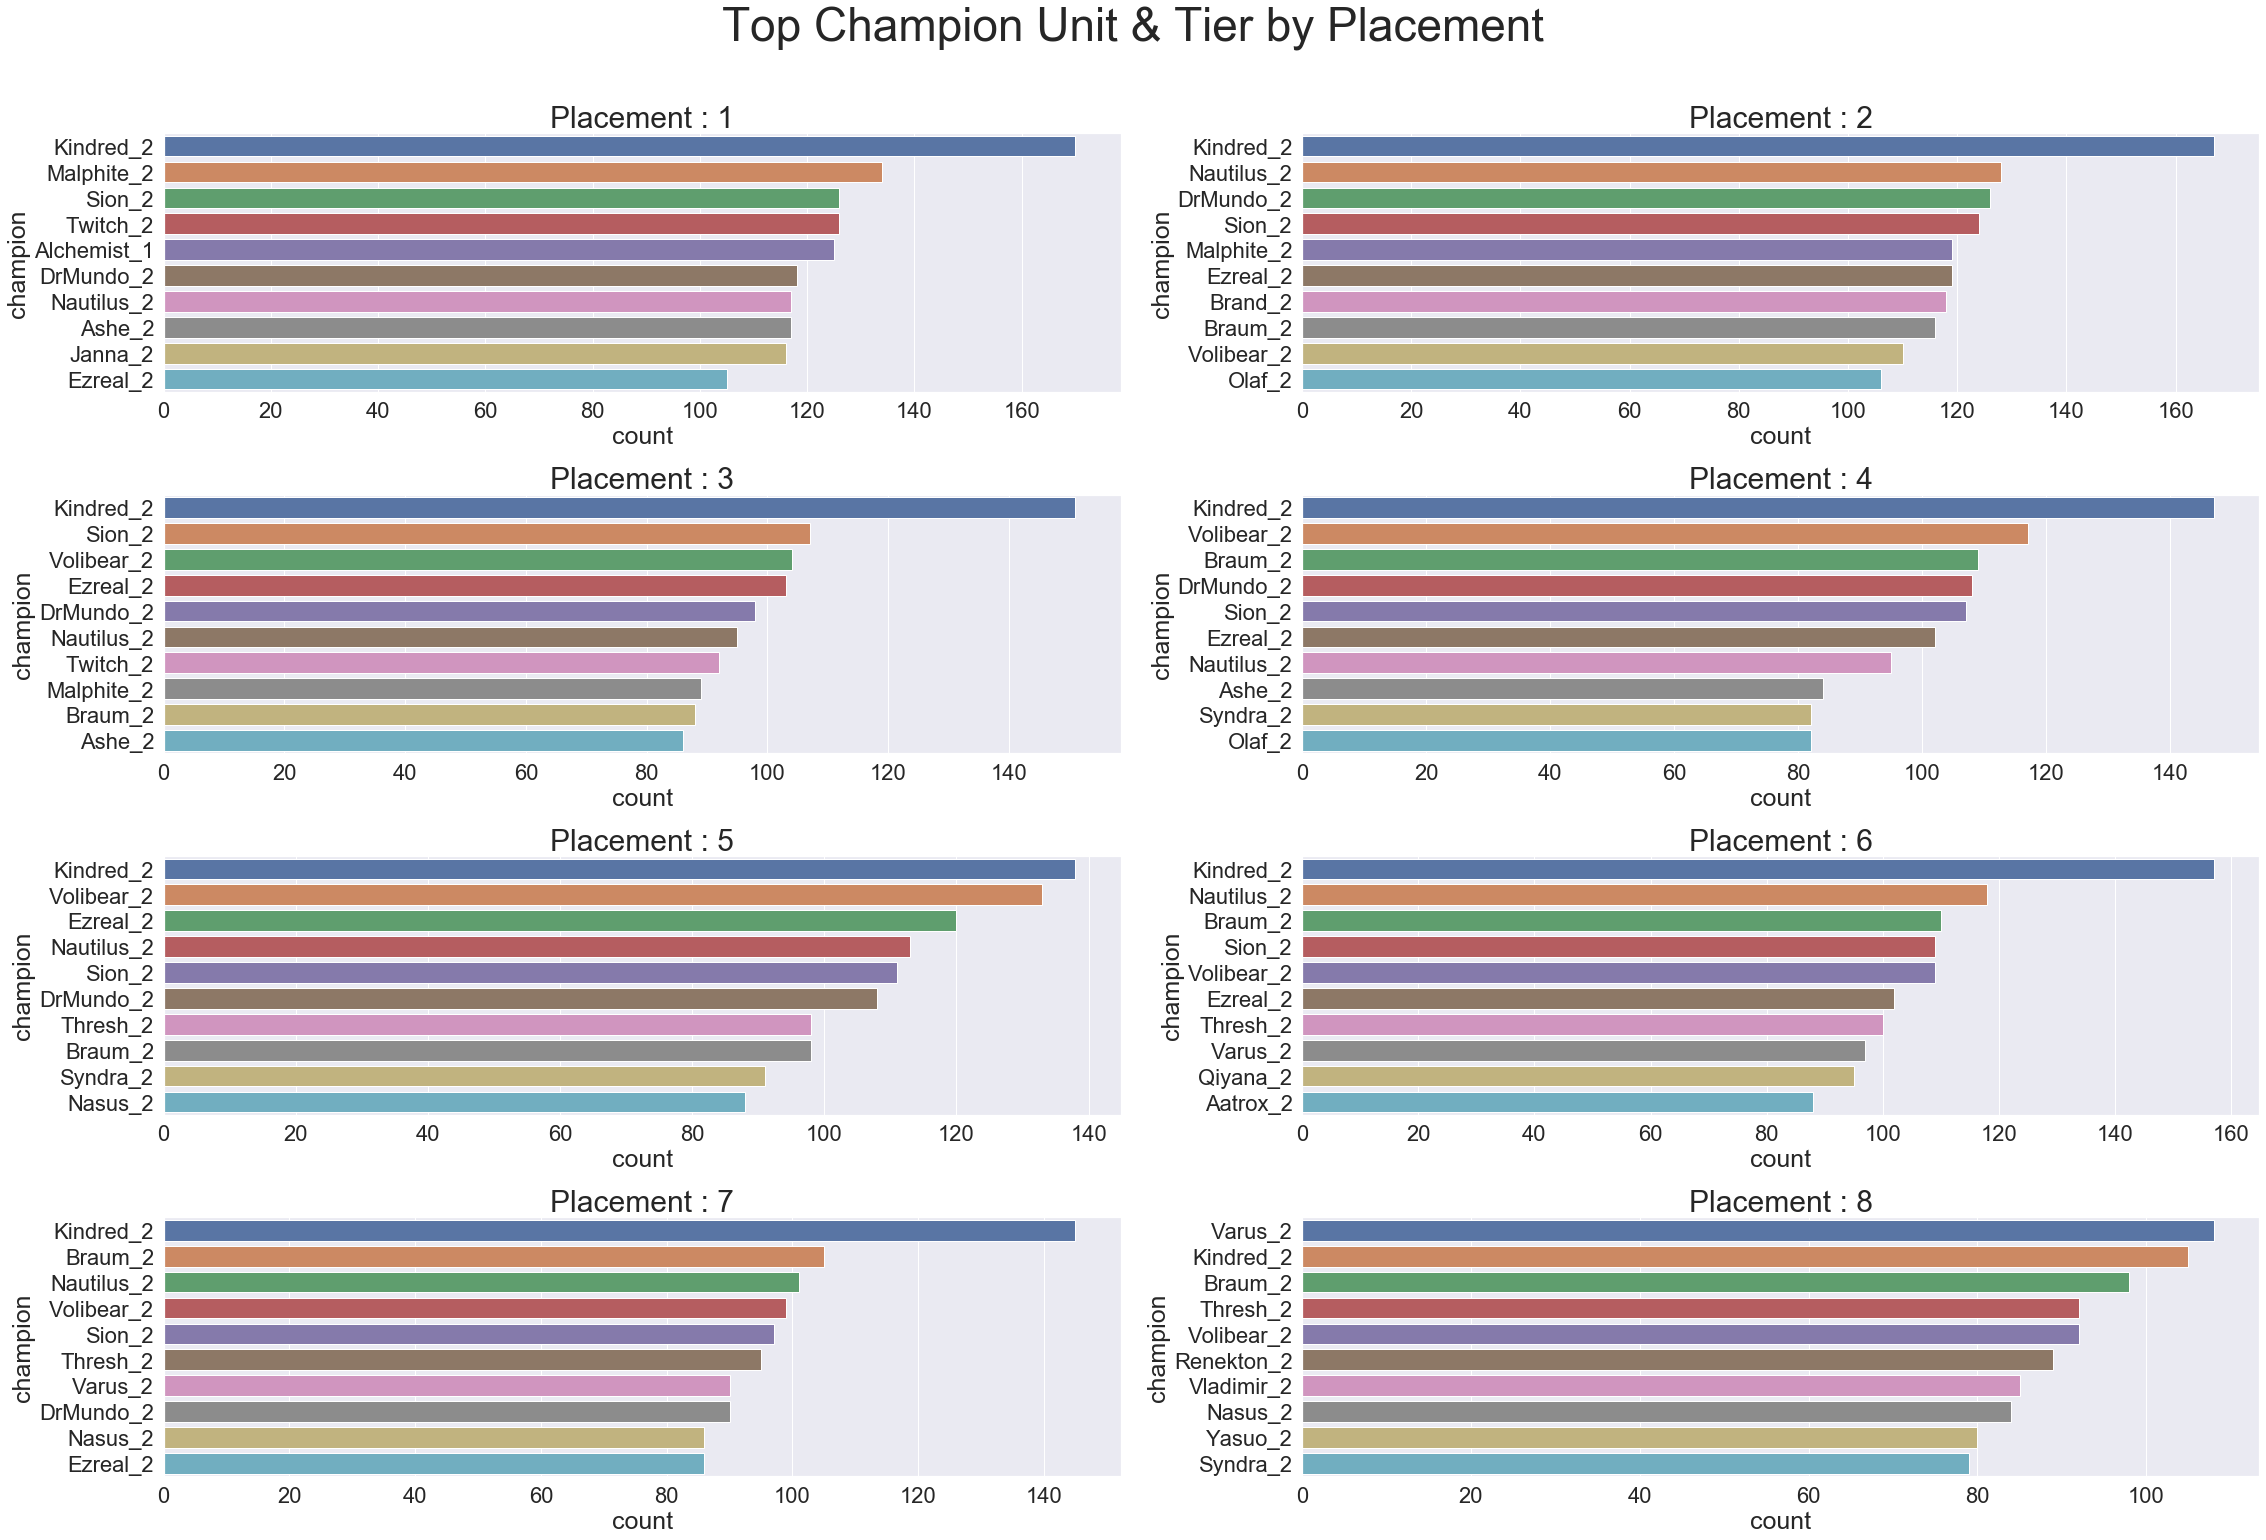

In [35]:
# code snippet from my reddit classification project
plt.figure(figsize = (32,22))
sns.set_style("whitegrid")
sns.set(font_scale = 2)
plt.suptitle('Top Champion Unit & Tier by Placement',fontsize = 46)

ax1 = plt.subplot(421)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('champion', fontsize=25)
ax1.set_title('Placement : 1',fontsize = 30)
ax1 = sns.barplot(data=champion_dict['champion_filtered_1_df'].head(10),x='count',y='champion',orient='h')

ax1 = plt.subplot(422)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('champion', fontsize=25)
ax1.set_title('Placement : 2',fontsize = 30)
ax1 = sns.barplot(data=champion_dict['champion_filtered_2_df'].head(10),x='count',y='champion',orient='h')

ax1 = plt.subplot(423)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('champion', fontsize=25)
ax1.set_title('Placement : 3',fontsize = 30)
ax1 = sns.barplot(data=champion_dict['champion_filtered_3_df'].head(10),x='count',y='champion',orient='h')

ax1 = plt.subplot(424)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('champion', fontsize=25)
ax1.set_title('Placement : 4',fontsize = 30)
ax1 = sns.barplot(data=champion_dict['champion_filtered_4_df'].head(10),x='count',y='champion',orient='h')

ax1 = plt.subplot(425)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('champion', fontsize=25)
ax1.set_title('Placement : 5',fontsize = 30)
ax1 = sns.barplot(data=champion_dict['champion_filtered_5_df'].head(10),x='count',y='champion',orient='h')

ax1 = plt.subplot(426)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('champion', fontsize=25)
ax1.set_title('Placement : 6',fontsize = 30)
ax1 = sns.barplot(data=champion_dict['champion_filtered_6_df'].head(10),x='count',y='champion',orient='h')

ax1 = plt.subplot(427)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('champion', fontsize=25)
ax1.set_title('Placement : 7',fontsize = 30)
ax1 = sns.barplot(data=champion_dict['champion_filtered_7_df'].head(10),x='count',y='champion',orient='h')

ax1 = plt.subplot(428)
ax1.set_xlabel('count', fontsize=25)
ax1.set_ylabel('champion', fontsize=25)
ax1.set_title('Placement : 8',fontsize = 30)
ax1 = sns.barplot(data=champion_dict['champion_filtered_8_df'].head(10),x='count',y='champion',orient='h')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.savefig('../plots/top_champion_count.png')

### observation from above

From the newly created visualizations entailing champion units information, there are few other things that can be inferred.
- Once again, most players have a similar trend of using Kindred, Malphite, and Sion overall for players where Kindred tier 2 seems to be the most popular unit overall.  Malphite and Sion seem to have diminishing usage as players have lower placement scores.  
- Twitch, Alchemist (Singed), and DrMundo actually show up much more on first place player's board more often than players with lower placement (which also makes sense considering how these units are in the Poison team composition since Poison was the only team composition that stood out for 1st place players compared to other players)